In [ ]:
from tensorflow.keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install --upgrade -q kaggle
!mkdir /root/.kaggle
import json
token = {
    "username": "Arsalan Hameed",
    "key": "71824991b0fadac07859c3f3fa4314f4"
}

with open('/root/.kaggle/kaggle.json', 'w') as config_file:
    json.dump(token, config_file)
!chmod 600 /root/.kaggle/kaggle.json

!kaggle kernels pull br0kej/beth-eda-processing-and-model-training


In [ ]:

import zipfile
zipref=zipfile.ZipFile("/content/rsna-bone-age.zip",'r')
zipref.extractall()
zipref.close()

!rm -rf /content/rsna-bone-age.zip

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
import seaborn as sns

In [ ]:
# check the distribution of the target variable
df['Malicious'].value_counts()

True     2845
False    2809
Name: Malicious, dtype: int64

In [ ]:
X = df[['READ_EXTERNAL_STORAGE', 'RECEIVE_BOOT_COMPLETED', 'WRITE_CONTACTS',
       'RECORD_AUDIO', 'ACCESS_CACHE_FILESYSTEM', 'RECEIVE', 'BILLING', 'READ',
       'ACCESS_LOCATION_EXTRA_COMMANDS', 'ACCESS_FINE_LOCATION',
       'READ_CONTACTS', 'USE_CREDENTIALS', 'DISABLE_KEYGUARD',
       'ACCESS_WIFI_STATE', 'CHANGE_CONFIGURATION', 'WRITE_INTERNAL_STORAGE',
       'SAMSUNG_TUNTAP', 'BROADCAST_STICKY', 'CHECK_LICENSE',
       'ACCESS_NETWORK_STATE', 'UPDATE_APP_OPS_STATS',
       'WRITE_EXTERNAL_STORAGE', 'READ_SMS', 'CAMERA', 'WRITE_SYNC_SETTINGS',
       'RECEIVE_MMS', 'READ_PHONE_STATE', 'INTERNET', 'SYSTEM_ALERT_WINDOW',
       'INSTALL_SHORTCUT', 'VIBRATE', 'WRITE_SMS', 'BROADCAST_BADGE',
       'C2D_MESSAGE', 'GET_ACCOUNTS', 'MOUNT_UNMOUNT_FILESYSTEMS', 'BLUETOOTH',
       'SET_WALLPAPER', 'GET_TASKS', 'READ_SETTINGS', 'MANAGE_ACCOUNTS',
       'WRITE', 'RESTART_PACKAGES', 'AUTHENTICATE_ACCOUNTS',
       'READ_USER_DICTIONARY', 'READ_PROFILE', 'INSTALL_PACKAGES',
       'WRITE_SETTINGS', 'SEND_SMS', 'FLASHLIGHT', 'READ_GSERVICES',
       'CALL_PHONE', 'READ_LOGS', 'KILL_BACKGROUND_PROCESSES', 'MAPS_RECEIVE',
       'WAKE_LOCK', 'READ_SYNC_SETTINGS', 'CHANGE_NETWORK_STATE',
       'WRITE_SECURE_SETTINGS', 'RECEIVE_WAP_PUSH', 'WRITE_APN_SETTINGS',
       'INTERACT_ACROSS_USERS_FULL', 'CHANGE_WIFI_STATE',
       'MODIFY_AUDIO_SETTINGS', 'BLUETOOTH_ADMIN', 'RECEIVE_SMS',
       'ACCESS_MTK_MMHW', 'UNINSTALL_SHORTCUT', 'READ_INTERNAL_STORAGE',
       'ACCESS_COARSE_LOCATION' , 'id']]
y = df['Malicious']

In [ ]:
sns.countplot(df['Malicious'], color=red)

NameError: ignored

In [ ]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
#build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

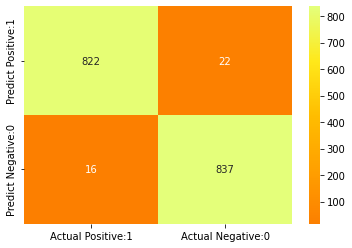

In [ ]:
# predict the results
sns.cubehelix_palette(as_cmap=True)
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])


sns.heatmap(cm_matrix, annot=True, fmt='d',cmap='Wistia_r')


ValueError: ignored

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9776


In [ ]:
y_pred_train = clf.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9972


In [ ]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9972
Test set score: 0.9776


In [ ]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[822  22]
 [ 16 837]]

True Positives(TP) =  822

True Negatives(TN) =  837

False Positives(FP) =  22

False Negatives(FN) =  16


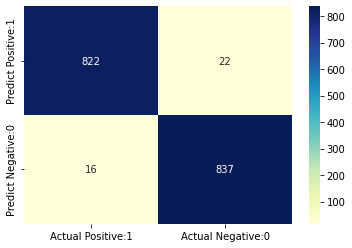

In [ ]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.97      0.98       844
        True       0.97      0.98      0.98       853

    accuracy                           0.98      1697
   macro avg       0.98      0.98      0.98      1697
weighted avg       0.98      0.98      0.98      1697



In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9381261048909841


In [ ]:
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9389671361502347
Recall: 0.9378663540445487


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[792  52]
 [ 53 800]]

True Positives(TP) =  792

True Negatives(TN) =  800

False Positives(FP) =  52

False Negatives(FN) =  53


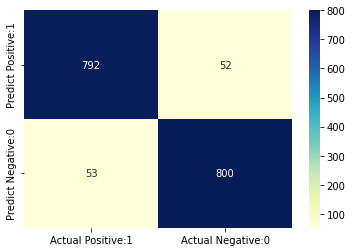

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import gc

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
TARGET = ['Malicious']
x = train_df.drop(columns=['Malicious'])
y = train_df[TARGET]
predTest = pd.DataFrame(0, index=np.arange(test_df.shape[0]), columns=TARGET)
predTrain = y[TARGET].copy()

#for seed in random.sample(range(300, 400), 20):
for seed in [357]:
    FOLDS = 10
    kf = StratifiedKFold(n_splits=FOLDS,shuffle = True, random_state=seed)

    model = RandomForestClassifier(n_estimators=140, max_depth=22, random_state=seed)

    scores = []

    fold_num = 0
    for train_index, test_index in kf.split(x,y):
        fold_num += 1
        X_train = x.iloc[train_index]
        y_train = y.iloc[train_index]
        X_val = x.loc[test_index]
        y_val = y.loc[test_index]

        model.fit(X_train,np.ravel(y_train))
        y_pred = model.predict(X_val)
        acc = accuracy_score(y_val,y_pred)
        scores.append(acc)
        print("Fold ",fold_num," Accuracy = ",acc)

        # OOF prediction
        oof_pred = model.predict(x)
        predTrain.loc[:,"Malicious"] += oof_pred

        # Test prediction
        test_pred = model.predict(test_df)
#        predTest.loc[:,f'{fold_num}_{seed}'] = test_pred
        predTest.loc[:,"Malicious"] += test_pred

    print(f"SEED{seed} CV Accuracy = ",np.mean(scores)," + ",np.std(scores))

Fold  1  Accuracy =  0.9717314487632509
Fold  2  Accuracy =  0.9734982332155477
Fold  3  Accuracy =  0.9699646643109541
Fold  4  Accuracy =  0.9699646643109541
Fold  5  Accuracy =  0.9752212389380531
Fold  6  Accuracy =  0.9805309734513274
Fold  7  Accuracy =  0.9734513274336283
Fold  8  Accuracy =  0.9575221238938053
Fold  9  Accuracy =  0.984070796460177
Fold  10  Accuracy =  0.9752212389380531
SEED357 CV Accuracy =  0.9731176709715751  +  0.006701192169535076


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9953216374269006
Recall: 0.9976553341148886


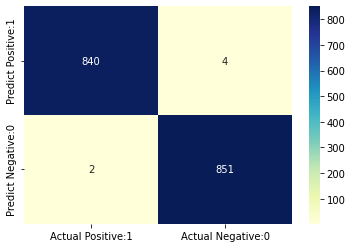

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
param_grid = {
    'n_estimators': [140],
    'max_depth' : [22]
}
model = RandomForestClassifier(random_state=seed)

CV = GridSearchCV(model,param_grid, cv=10, n_jobs= 1)

CV.fit(x, np.ravel(y))
print(CV.best_params_)
print(CV.best_score_)

{'max_depth': 22, 'n_estimators': 140}
0.9725879483410989


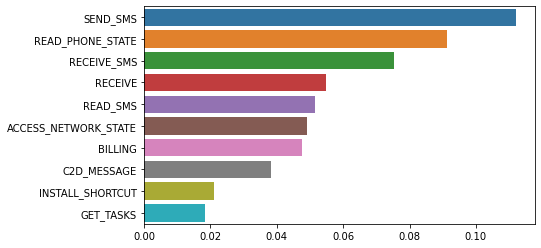

In [ ]:
import matplotlib.pyplot as plt # plotting
import seaborn as sns # visualisation

feature_imp = pd.Series(CV.best_estimator_.feature_importances_,index=CV.best_estimator_.feature_names_in_).sort_values(ascending=False)
f,ax = plt.subplots(figsize=(7,4))
ax = sns.barplot(x=feature_imp[1:11], y=feature_imp[1:11].index)
#ax.set_title('Feature importance for model')
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9505008839127873


In [ ]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9571938168846611
Recall: 0.943728018757327


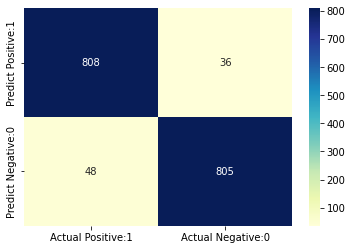

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# To work with the date
import datetime
# We will be working with pandas
import pandas as pd
# To pull the data from yahoo
import pandas_datareader as web
# To visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_corr = df.corr()

In [ ]:
df_corr

,READ_EXTERNAL_STORAGE,RECEIVE_BOOT_COMPLETED,WRITE_CONTACTS,RECORD_AUDIO,ACCESS_CACHE_FILESYSTEM,RECEIVE,BILLING,READ,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_FINE_LOCATION,...,CHANGE_WIFI_STATE,MODIFY_AUDIO_SETTINGS,BLUETOOTH_ADMIN,RECEIVE_SMS,ACCESS_MTK_MMHW,UNINSTALL_SHORTCUT,READ_INTERNAL_STORAGE,ACCESS_COARSE_LOCATION,Malicious,id
READ_EXTERNAL_STORAGE,1.000000,0.166898,-0.002317,0.126309,0.337064,0.035168,0.083938,0.037137,0.392734,0.324279,...,0.299043,0.048573,0.083882,-0.002220,0.349474,0.153865,0.361804,0.315149,-0.057097,-0.038375
RECEIVE_BOOT_COMPLETED,0.166898,1.000000,0.205691,0.080519,0.254007,-0.080089,-0.028520,0.101725,0.204570,0.192952,...,0.408302,0.143442,0.100253,0.305854,0.264087,0.185154,0.256798,0.205814,0.148248,0.080986
WRITE_CONTACTS,-0.002317,0.205691,1.000000,0.199355,-0.032383,0.011470,0.011860,0.127235,-0.022750,0.031424,...,0.165290,0.369699,0.096290,0.206247,-0.052772,0.250507,-0.061513,0.028999,0.037102,0.045057
RECORD_AUDIO,0.126309,0.080519,0.199355,1.000000,-0.043689,0.104681,0.125642,0.136149,0.011637,0.174496,...,0.099867,0.376549,0.121970,-0.049148,-0.062477,0.046761,-0.067898,0.142472,-0.127651,-0.057431
ACCESS_CACHE_FILESYSTEM,0.337064,0.254007,-0.032383,-0.043689,1.000000,-0.145993,-0.092088,-0.028886,0.708797,0.327028,...,0.419834,-0.032468,-0.017685,0.287941,0.877786,0.018024,0.892985,0.334372,0.218595,0.109161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UNINSTALL_SHORTCUT,0.153865,0.185154,0.250507,0.046761,0.018024,-0.060954,-0.052194,0.047052,0.178369,0.146145,...,0.354657,0.246312,0.127811,0.162124,0.033971,1.000000,-0.001713,0.153069,0.127088,0.068899
READ_INTERNAL_STORAGE,0.361804,0.256798,-0.061513,-0.067898,0.892985,-0.148525,-0.102081,-0.037282,0.729573,0.341062,...,0.432029,-0.008090,-0.042906,0.291107,0.884098,-0.001713,1.000000,0.350616,0.214906,0.107087
ACCESS_COARSE_LOCATION,0.315149,0.205814,0.028999,0.142472,0.334372,0.050559,-0.010467,0.069609,0.453194,0.791838,...,0.332268,0.113953,0.159293,0.052128,0.332705,0.153069,0.350616,1.000000,-0.008413,-0.015958
Malicious,-0.057097,0.148248,0.037102,-0.127651,0.218595,-0.440585,-0.466490,-0.152765,0.253192,-0.040234,...,0.287491,-0.015089,-0.111022,0.633396,0.228934,0.127088,0.214906,-0.008413,1.000000,0.528749


In [ ]:
np.ones_like(df_corr, dtype=np.bool)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

In [ ]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

In [ ]:
import seaborn as sb

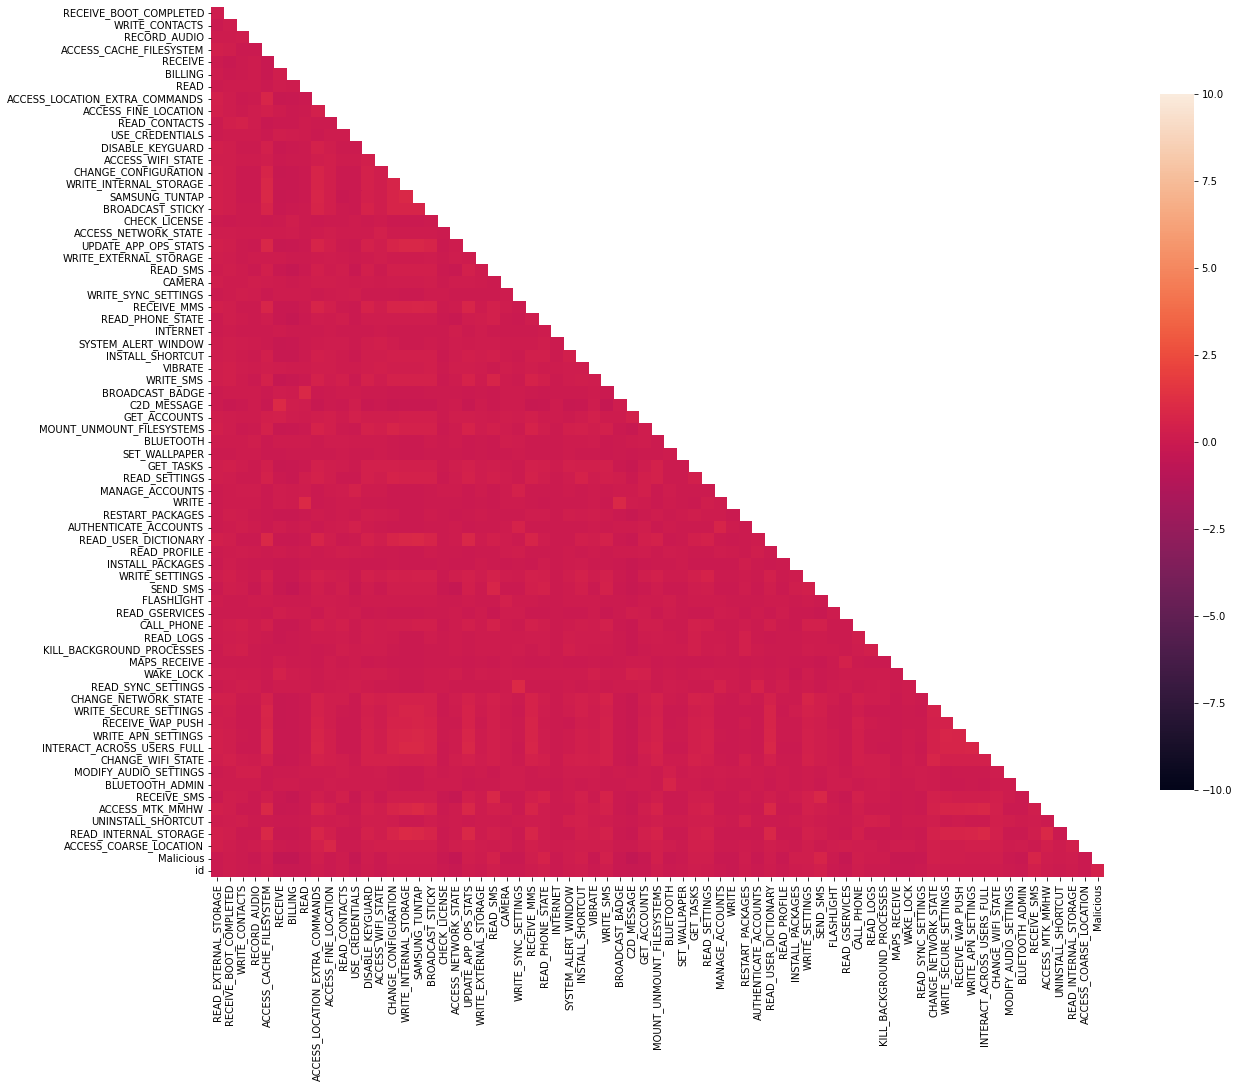

In [ ]:
fig, ax = plt.subplots(figsize=(20,16))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sb.heatmap(corr, mask=mask, fmt=".2f", annot = False,
           vmin=-10, vmax=10, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()